Pontifícia Universidade Católica de São Paulo 

`Ciência de Dados e Inteligência Artificial`

🎓 Laboratório 9 - Regressão Logística (Parte 2)

---
> 👨‍🏫*Professor Rooney Coelho (rracoelho@pucsp.br)*
---

Concluindo esta atividade você se tornará apto a ser um mestre Pokemon! Vamos ensinar o computador a reconhecer qual o tipo de cada Pokemon. 

<img src='https://tm.ibxk.com.br/2019/09/30/30091641838086.jpg?ims=1120x420' width=500>

Para esta atividade vamos focar apenas em três tipos, grama, fogo e água. Fique a vontade para treinar o seu modelo para reconhecer mais tipos, assim você pode ganhar insignias nos ginásios com maior facilidade (o professor de vocês não tem nada melhor para fazer mesmo...)

É necessário instalar algumas bibliotecas antes de executar a célula abaixo com êxito, busque na internet como fazer isso dependendo do erro que você obter.

In [1]:
# Importe aqui as bibliotecas necessárias
import pandas as pd
import numpy as np
import cv2
import os

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

### 1) Carregue a base de dados com os metadados de todos os Pokemons

Chame o DataFrame de `df`

Coloque como índice a coluna `pokedex_number`, ela é como o CPF de cada Pokemon.

In [2]:
# Abrindo a Pokédex
df = pd.read_csv('dados/pokemon.csv', index_col = 'pokedex_number')
df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,name,percentage_male,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
pokedex_number,,,,,,,,,,,,,,,,,,,,,
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Bulbasaur,88.1,65,65,45,grass,poison,6.9,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Ivysaur,88.1,80,80,60,grass,poison,13.0,1,0
3,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Venusaur,88.1,122,120,80,grass,poison,100.0,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Charmander,88.1,60,50,65,fire,NaN,8.5,1,0
5,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Charmeleon,88.1,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,Celesteela,NaN,107,101,61,steel,flying,999.9,7,1
798,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,Kartana,NaN,59,31,109,grass,steel,0.1,7,1
799,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,Guzzlord,NaN,97,53,43,dark,dragon,888.0,7,1


Veja aqui quais são as colunas existentes.

In [3]:
# Colunas 
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'sp_attack', 'sp_defense',
       'speed', 'type1', 'type2', 'weight_kg', 'generation', 'is_legendary'],
      dtype='object')

Note que o tipo primário de cada pokemon é chamado de `type1`. Mostre aqui os seus valores únicos.

In [4]:
# Verificando valores únicos da coluna 'type1'
df['type1'].unique()

array(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric',
       'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice',
       'dragon', 'dark', 'steel', 'flying'], dtype=object)

Crie um `DataFrame` com as colunas `type1` e `name` sendo a colúna índice o `pokedex_number`.

In [6]:
# Dataframe com as colunas 'type1', 'name' e indexado pela coluna 'pokedex_number'
short_pokedex = df[['type1', 'name']]
short_pokedex.head(9)

,type1,name
pokedex_number,,
1,grass,Bulbasaur
2,grass,Ivysaur
3,grass,Venusaur
4,fire,Charmander
5,fire,Charmeleon
6,fire,Charizard
7,water,Squirtle
8,water,Wartortle
9,water,Blastoise


### 2) Carregue a base de dados de imagens dos Pokemons

Use esta função auxiliar para carregar a base de dados de imagens. Note que aqui usamos o OpenCV para ler as imagens, e também fazer um pré-processamento. Aqui fazemos a verredura de um diretório inteiro lendo todos os seus arquivos!

In [7]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img_256x256 =  cv2.resize(img, (256,256))
            images.append(cv2.cvtColor(img_256x256, cv2.COLOR_BGR2RGB))
    return images

Utilize a função auxiliar e salve o resultado em uma lista chamada `imagens`. Ela é uma lista de matrizes do numpy.

In [8]:
# Carregando as imagens
imagens = load_images_from_folder('dados/pokemon_images')
imagens

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

Execute o bloco para testar se as imagens foram lidas corretamente. Aqui temos apenas uma amostragem de todas as imagens.

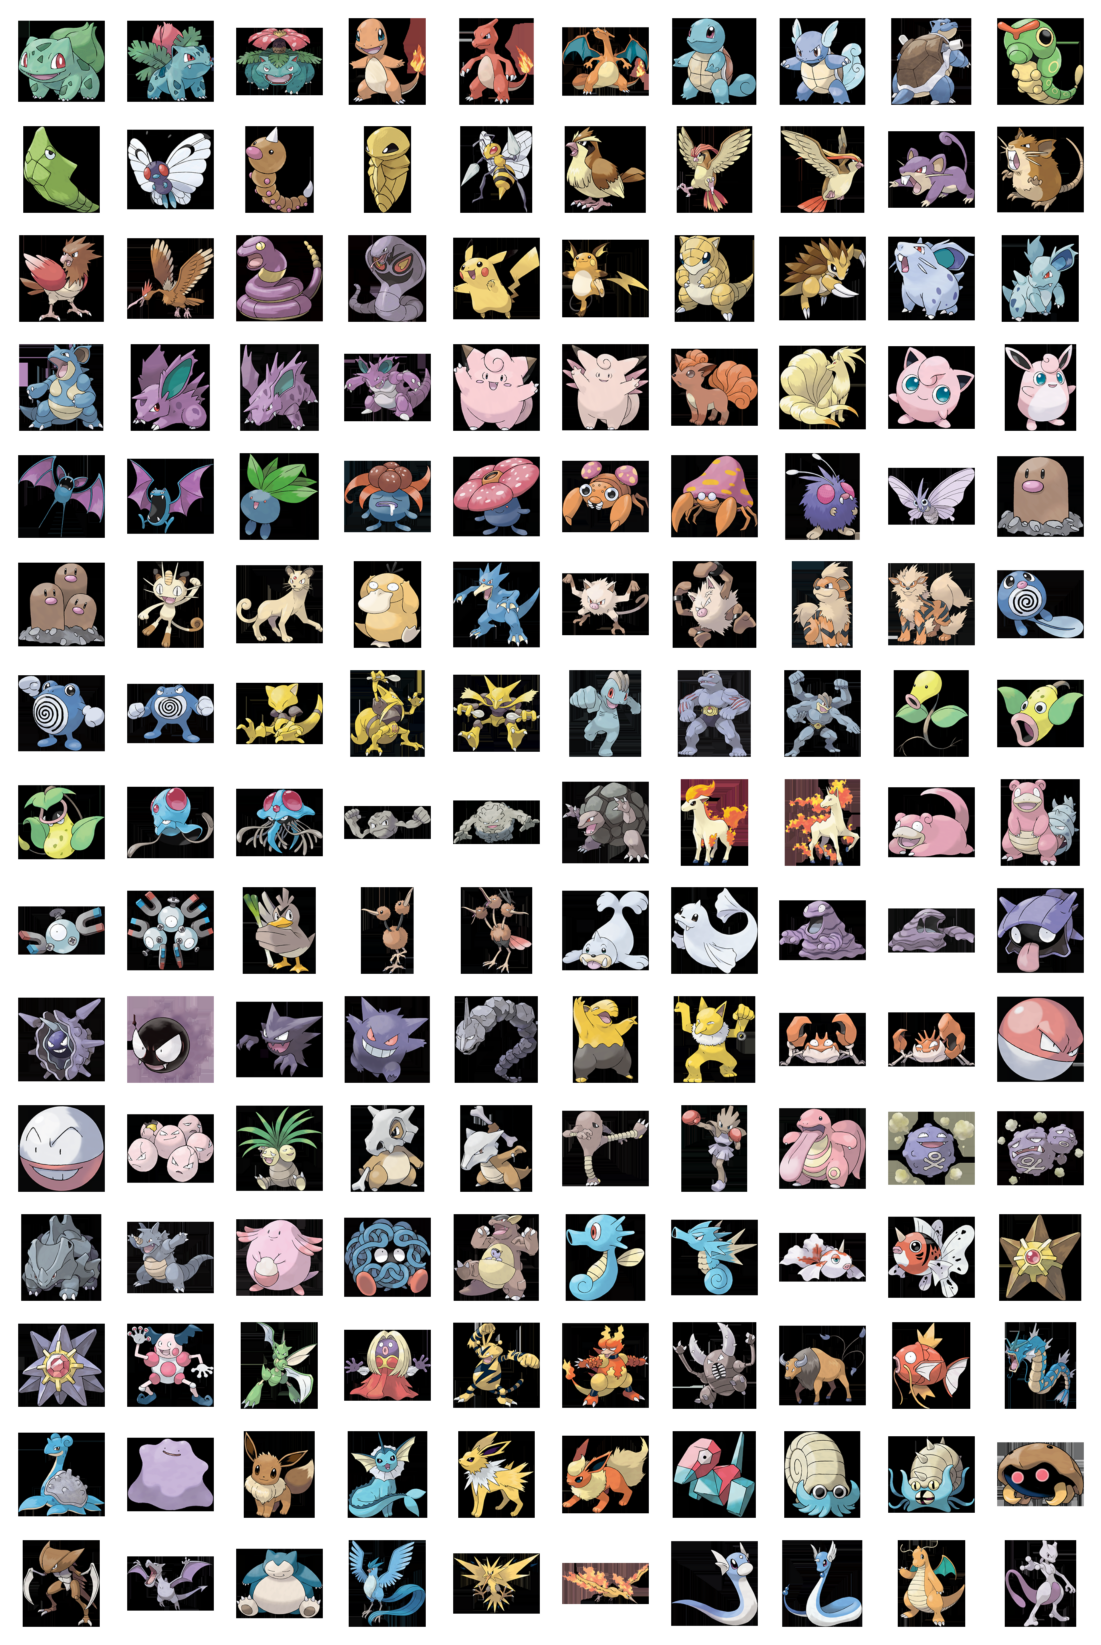

In [9]:
fig = plt.figure(figsize=(20,30))
grid = ImageGrid(fig,111,
                 nrows_ncols=(15, 10),  
                 axes_pad=0,  
                 )

for ax, im in zip(grid, imagens):
    ax.imshow(im)
    ax.axis('off')

plt.show()

Note que as imagens, que estão em `jpg` possuem um fundo preto circundando o Pokemon, além de termos uma tarja branca nas fotos. Para a classificação vamos despresar estes valores que são comuns em todas as fotos e não servem para a classificação.

Substitua agora `img` que não foi definida ainda, por alguma imagem que está na lista de imagens e faça um histograma para as cores da imagem. Note que no histograma eu não coloquei as bordas (branco e preto) tente incluí-las para ver o que acontece.

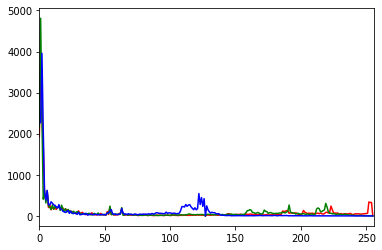

In [10]:
# Calcular o histograma para cada canal
colors = ('r','g','b')
# Para cada canal: calcular o histograma e adicionar à lista de features
img = imagens[144]
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([img], # Imagem
                            [i], # Índice do canal
                            None, # Sem usar máscara
                            [256], # Tamanho do histograma
                            [1,255]) # Range - Removendo o preto e o branco para uma melhor visualização!!!
    plt.plot(histogram, color = channel)
    plt.xlim([0,256])
plt.show()

### 3) Criando os Embeddings

Como já falamos em processamento de textos, é possível criar uma representação de algo complexo (um espaço vetorial grande) em um menor que seja representativo. A isto damos o nome de Embeddings, que é algo comum em aplicações de Aprendizagem de máquina.

Use a função auxiliar abaixo para a criação dos Embeddings das fotos dos Pokemons.

In [11]:
def embeddings(img):
    # Criar uma lista para o valor dos atributos
    features = []
    # Para cada canal: calcular o histograma e adicionar à lista de features
    for i in range(3):
        histogram, bin_edges = np.histogram(
            img[:, :, i], bins=10, range=(1, 255) # remover o preto e o branco (coloquei só 10 bins para cada canal de cor)
        )
        features.append(histogram)

    # Criar um vetor para as features (concatenação dos histogramas)
    return np.array(features).flatten().astype(int)

Vamos primeiro garantir que a nossa lista de imagens tenha o mesmo tamanho que nosso dataframe

In [12]:
imagens = imagens[:len(df)]

No código abaixo eu apenas preenchi o esqueleto do DataFrame, preenchendo ele com zeros.

Coloque como coluna índice `pokedex_number` e sobreescreva cada linha com os embeddings para as cores.

In [13]:
df2 = pd.DataFrame(np.zeros((len(short_pokedex),10*3)).astype(int)) # (coloquei só 10 bins para cada canal de cor)

In [14]:
df2

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df2 = df2.set_index(short_pokedex.index)
df2

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
pokedex_number,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Execute as células abaixo para normalizar o DataFrame. Não use normalização na coluna alvo.

In [16]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(df2)  
transformer

Normalizer()

In [32]:
df3 = pd.DataFrame( transformer.transform(df2) )
df3

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Para cada imagem, usar a função embeddings para calcular os atributos e adicionar à tabela
for i, img in enumerate(imagens):
    df3.loc[i] = embeddings(img)
df3

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1872.0,1146.0,2700.0,4821.0,7252.0,8790.0,1994.0,645.0,124.0,26990.0,...,1794.0,751.0,2225.0,2506.0,4962.0,8346.0,6847.0,1834.0,118.0,27000.0
1,2696.0,1644.0,4101.0,6222.0,4600.0,4463.0,724.0,872.0,937.0,27274.0,...,2423.0,791.0,1777.0,1911.0,7163.0,2322.0,5084.0,5166.0,364.0,26730.0
2,4188.0,1874.0,6233.0,3150.0,2070.0,1826.0,777.0,1621.0,2116.0,33615.0,...,4133.0,1116.0,2752.0,3775.0,4043.0,4585.0,2183.0,1641.0,251.0,32983.0
3,2300.0,491.0,713.0,504.0,1385.0,4035.0,1205.0,3085.0,3200.0,35830.0,...,2253.0,874.0,5608.0,1924.0,7902.0,1443.0,691.0,1682.0,1663.0,28541.0
4,3078.0,522.0,692.0,484.0,797.0,4988.0,1913.0,3823.0,5040.0,32164.0,...,3214.0,843.0,7609.0,4017.0,4257.0,950.0,745.0,1394.0,460.0,29800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,7303.0,7335.0,4938.0,10675.0,2140.0,4286.0,1994.0,1871.0,729.0,15386.0,...,6131.0,4537.0,2701.0,4183.0,2442.0,4946.0,9895.0,6002.0,806.0,15226.0
797,5689.0,819.0,317.0,410.0,918.0,867.0,982.0,2034.0,1183.0,20486.0,...,7560.0,1916.0,1632.0,432.0,778.0,414.0,441.0,1657.0,852.0,19319.0
798,6462.0,5588.0,9049.0,1141.0,289.0,312.0,456.0,370.0,797.0,27275.0,...,5933.0,2924.0,5137.0,8473.0,838.0,482.0,1963.0,567.0,565.0,25595.0
799,2617.0,4579.0,3568.0,1773.0,973.0,1864.0,23980.0,1171.0,547.0,24462.0,...,2013.0,5507.0,3568.0,1799.0,998.0,16183.0,10330.0,382.0,714.0,24041.0


In [34]:
df3 = df3.set_index(df2.index)
df3

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
pokedex_number,,,,,,,,,,,,,,,,,,,,,
1,1872.0,1146.0,2700.0,4821.0,7252.0,8790.0,1994.0,645.0,124.0,26990.0,...,1794.0,751.0,2225.0,2506.0,4962.0,8346.0,6847.0,1834.0,118.0,27000.0
2,2696.0,1644.0,4101.0,6222.0,4600.0,4463.0,724.0,872.0,937.0,27274.0,...,2423.0,791.0,1777.0,1911.0,7163.0,2322.0,5084.0,5166.0,364.0,26730.0
3,4188.0,1874.0,6233.0,3150.0,2070.0,1826.0,777.0,1621.0,2116.0,33615.0,...,4133.0,1116.0,2752.0,3775.0,4043.0,4585.0,2183.0,1641.0,251.0,32983.0
4,2300.0,491.0,713.0,504.0,1385.0,4035.0,1205.0,3085.0,3200.0,35830.0,...,2253.0,874.0,5608.0,1924.0,7902.0,1443.0,691.0,1682.0,1663.0,28541.0
5,3078.0,522.0,692.0,484.0,797.0,4988.0,1913.0,3823.0,5040.0,32164.0,...,3214.0,843.0,7609.0,4017.0,4257.0,950.0,745.0,1394.0,460.0,29800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,7303.0,7335.0,4938.0,10675.0,2140.0,4286.0,1994.0,1871.0,729.0,15386.0,...,6131.0,4537.0,2701.0,4183.0,2442.0,4946.0,9895.0,6002.0,806.0,15226.0
798,5689.0,819.0,317.0,410.0,918.0,867.0,982.0,2034.0,1183.0,20486.0,...,7560.0,1916.0,1632.0,432.0,778.0,414.0,441.0,1657.0,852.0,19319.0
799,6462.0,5588.0,9049.0,1141.0,289.0,312.0,456.0,370.0,797.0,27275.0,...,5933.0,2924.0,5137.0,8473.0,838.0,482.0,1963.0,567.0,565.0,25595.0


Agora acrescente uma coluna de `classe` e copie os valores de `type1` do primeiro DataFrame.

In [35]:
# adicionar a coluna 'type1' ao dataframe como 'classe'
df3['classe'] = df['type1'].values
df3

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,classe
pokedex_number,,,,,,,,,,,,,,,,,,,,,
1,1872.0,1146.0,2700.0,4821.0,7252.0,8790.0,1994.0,645.0,124.0,26990.0,...,751.0,2225.0,2506.0,4962.0,8346.0,6847.0,1834.0,118.0,27000.0,grass
2,2696.0,1644.0,4101.0,6222.0,4600.0,4463.0,724.0,872.0,937.0,27274.0,...,791.0,1777.0,1911.0,7163.0,2322.0,5084.0,5166.0,364.0,26730.0,grass
3,4188.0,1874.0,6233.0,3150.0,2070.0,1826.0,777.0,1621.0,2116.0,33615.0,...,1116.0,2752.0,3775.0,4043.0,4585.0,2183.0,1641.0,251.0,32983.0,grass
4,2300.0,491.0,713.0,504.0,1385.0,4035.0,1205.0,3085.0,3200.0,35830.0,...,874.0,5608.0,1924.0,7902.0,1443.0,691.0,1682.0,1663.0,28541.0,fire
5,3078.0,522.0,692.0,484.0,797.0,4988.0,1913.0,3823.0,5040.0,32164.0,...,843.0,7609.0,4017.0,4257.0,950.0,745.0,1394.0,460.0,29800.0,fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,7303.0,7335.0,4938.0,10675.0,2140.0,4286.0,1994.0,1871.0,729.0,15386.0,...,4537.0,2701.0,4183.0,2442.0,4946.0,9895.0,6002.0,806.0,15226.0,steel
798,5689.0,819.0,317.0,410.0,918.0,867.0,982.0,2034.0,1183.0,20486.0,...,1916.0,1632.0,432.0,778.0,414.0,441.0,1657.0,852.0,19319.0,grass
799,6462.0,5588.0,9049.0,1141.0,289.0,312.0,456.0,370.0,797.0,27275.0,...,2924.0,5137.0,8473.0,838.0,482.0,1963.0,567.0,565.0,25595.0,dark


Use o método `isin()` do Pandas para filtrar apenas as correspondências da lista abaixo em `df2`.

In [37]:
filtro = ['grass', 'fire', 'water']
# continua...
df3 = df3[df3['classe'].isin(filtro)]
df3

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,classe
pokedex_number,,,,,,,,,,,,,,,,,,,,,
1,1872.0,1146.0,2700.0,4821.0,7252.0,8790.0,1994.0,645.0,124.0,26990.0,...,751.0,2225.0,2506.0,4962.0,8346.0,6847.0,1834.0,118.0,27000.0,grass
2,2696.0,1644.0,4101.0,6222.0,4600.0,4463.0,724.0,872.0,937.0,27274.0,...,791.0,1777.0,1911.0,7163.0,2322.0,5084.0,5166.0,364.0,26730.0,grass
3,4188.0,1874.0,6233.0,3150.0,2070.0,1826.0,777.0,1621.0,2116.0,33615.0,...,1116.0,2752.0,3775.0,4043.0,4585.0,2183.0,1641.0,251.0,32983.0,grass
4,2300.0,491.0,713.0,504.0,1385.0,4035.0,1205.0,3085.0,3200.0,35830.0,...,874.0,5608.0,1924.0,7902.0,1443.0,691.0,1682.0,1663.0,28541.0,fire
5,3078.0,522.0,692.0,484.0,797.0,4988.0,1913.0,3823.0,5040.0,32164.0,...,843.0,7609.0,4017.0,4257.0,950.0,745.0,1394.0,460.0,29800.0,fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,3576.0,1060.0,2151.0,3743.0,2149.0,2188.0,1389.0,1251.0,1118.0,30665.0,...,3392.0,8620.0,6334.0,1628.0,107.0,254.0,173.0,169.0,24567.0,fire
779,1576.0,348.0,553.0,966.0,1518.0,4312.0,2510.0,1207.0,2695.0,36456.0,...,387.0,1948.0,2167.0,1267.0,1582.0,4739.0,942.0,1750.0,35804.0,water
787,7928.0,3003.0,4961.0,2199.0,1278.0,1638.0,942.0,1670.0,3242.0,23647.0,...,4654.0,9363.0,3033.0,629.0,451.0,202.0,91.0,311.0,23485.0,grass


Faça agora a fatorização da coluna `classes` para transformar seus valores em categorias.

In [38]:
# fatorização da coluna 'classe'
df3['classe'] = pd.factorize(df3['classe'])[0]
df3

C:\Users\ISAAC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,classe
pokedex_number,,,,,,,,,,,,,,,,,,,,,
1,1872.0,1146.0,2700.0,4821.0,7252.0,8790.0,1994.0,645.0,124.0,26990.0,...,751.0,2225.0,2506.0,4962.0,8346.0,6847.0,1834.0,118.0,27000.0,0
2,2696.0,1644.0,4101.0,6222.0,4600.0,4463.0,724.0,872.0,937.0,27274.0,...,791.0,1777.0,1911.0,7163.0,2322.0,5084.0,5166.0,364.0,26730.0,0
3,4188.0,1874.0,6233.0,3150.0,2070.0,1826.0,777.0,1621.0,2116.0,33615.0,...,1116.0,2752.0,3775.0,4043.0,4585.0,2183.0,1641.0,251.0,32983.0,0
4,2300.0,491.0,713.0,504.0,1385.0,4035.0,1205.0,3085.0,3200.0,35830.0,...,874.0,5608.0,1924.0,7902.0,1443.0,691.0,1682.0,1663.0,28541.0,1
5,3078.0,522.0,692.0,484.0,797.0,4988.0,1913.0,3823.0,5040.0,32164.0,...,843.0,7609.0,4017.0,4257.0,950.0,745.0,1394.0,460.0,29800.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,3576.0,1060.0,2151.0,3743.0,2149.0,2188.0,1389.0,1251.0,1118.0,30665.0,...,3392.0,8620.0,6334.0,1628.0,107.0,254.0,173.0,169.0,24567.0,1
779,1576.0,348.0,553.0,966.0,1518.0,4312.0,2510.0,1207.0,2695.0,36456.0,...,387.0,1948.0,2167.0,1267.0,1582.0,4739.0,942.0,1750.0,35804.0,2
787,7928.0,3003.0,4961.0,2199.0,1278.0,1638.0,942.0,1670.0,3242.0,23647.0,...,4654.0,9363.0,3033.0,629.0,451.0,202.0,91.0,311.0,23485.0,0


### 4) Divisão dos dados

Divida os dados em 20% para teste.

In [39]:
features = df3.drop('classe',axis=1)
target = df3['classe']

# dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [40]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(195, 30)
(195,)
(49, 30)
(49,)


Execute a célula abaixo para conferir se a mesma proporção de treino e teste foi respeitada:

In [41]:
aux1 = y_train.value_counts().sort_values(ascending=False)
aux2 = y_test.value_counts().sort_values(ascending=False)

aux1 = aux1/sum(aux1) * 100
aux2 = aux2/sum(aux2) * 100

# Imprir de forma tabelada para comparação
pd.concat([aux1, aux2], axis=1)

,classe,classe
2,45.641026,51.020408
0,32.820513,28.571429
1,21.538462,20.408163


Podemos confirmar que cada conjunto de dados tem uma distribuição semelhante de classes, portanto, ao treinar a regressão logística, poderemos generalizar e reduzir o risco de overfitting aos dados de treinamento! 

### 5) Faça agora a validação cruzada

Para melhorar a performance do seu modelo faça a validação cruzada com 5 folds e use um limite de 1000 iterações.

In [42]:
# Treinando o modelo 5 folds e com 1000 iterações
model = LogisticRegressionCV(cv=5, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

C:\Users\ISAAC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\ISAAC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-l

LogisticRegressionCV(cv=5, max_iter=1000, random_state=42)

Veja agora quão bom ficou o seu modelo com o `classification_report`.

In [43]:
# Classification report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.47      0.50      0.48        14
           1       0.70      0.70      0.70        10
           2       0.75      0.72      0.73        25

    accuracy                           0.65        49
   macro avg       0.64      0.64      0.64        49
weighted avg       0.66      0.65      0.66        49



Parabéns, você ensinou ao computador a identificar Pokemons de água, fogo e grama! 